### Machine Learning Coursework

### Student ID: 00019257

### Task 1. Loading Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("Libraries are imported")

Libraries are imported


In [2]:
# # Load the dataset
# # My dataset uses semicolon as delimiter and requires specific encoding "cp1252"
df = pd.read_csv('data/apartments_for_rent_classified_10K.csv', delimiter=';', encoding='cp1252')

print("Dataset is loaded")
print(f"Dataset shape: {df.shape}")

Dataset is loaded
Dataset shape: (10000, 22)


In [3]:
# first 5 rows will be shown
print("\nFirst 5 rows of the dataset:")
df.head()


First 5 rows of the dataset:


,id,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,...,price_display,price_type,square_feet,address,cityname,state,latitude,longitude,source,time
0,5668626895,housing/rent/apartment,"Studio apartment 2nd St NE, Uhland Terrace NE,...","This unit is located at second St NE, Uhland T...",NaN,NaN,0.0,USD,No,Thumbnail,...,$790,Monthly,101,NaN,Washington,DC,38.9057,-76.9861,RentLingo,1577359415
1,5664597177,housing/rent/apartment,Studio apartment 814 Schutte Road,"This unit is located at 814 Schutte Road, Evan...",NaN,NaN,1.0,USD,No,Thumbnail,...,$425,Monthly,106,814 Schutte Rd,Evansville,IN,37.9680,-87.6621,RentLingo,1577017063
2,5668626833,housing/rent/apartment,"Studio apartment N Scott St, 14th St N, Arling...","This unit is located at N Scott St, 14th St N,...",NaN,1.0,0.0,USD,No,Thumbnail,...,"$1,390",Monthly,107,NaN,Arlington,VA,38.8910,-77.0816,RentLingo,1577359410
3,5659918074,housing/rent/apartment,Studio apartment 1717 12th Ave,"This unit is located at 1717 12th Ave, Seattle...",NaN,1.0,0.0,USD,No,Thumbnail,...,$925,Monthly,116,1717 12th Avenue,Seattle,WA,47.6160,-122.3275,RentLingo,1576667743
4,5668626759,housing/rent/apartment,"Studio apartment Washington Blvd, N Cleveland ...","This unit is located at Washington Blvd, N Cle...",NaN,NaN,0.0,USD,No,Thumbnail,...,$880,Monthly,125,NaN,Arlington,VA,38.8738,-77.1055,RentLingo,1577359401


### Task 2: Exploratory Data Analysis

In [4]:
# dataset information
print("Dataset Information:")
df.info()

print("\nColumn Names:")
for i, col in enumerate(df.columns, 1):
    print(f"{i}. {col}")

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             10000 non-null  int64  
 1   category       10000 non-null  object 
 2   title          10000 non-null  object 
 3   body           10000 non-null  object 
 4   amenities      6451 non-null   object 
 5   bathrooms      9966 non-null   float64
 6   bedrooms       9993 non-null   float64
 7   currency       10000 non-null  object 
 8   fee            10000 non-null  object 
 9   has_photo      10000 non-null  object 
 10  pets_allowed   5837 non-null   object 
 11  price          10000 non-null  int64  
 12  price_display  10000 non-null  object 
 13  price_type     10000 non-null  object 
 14  square_feet    10000 non-null  int64  
 15  address        6673 non-null   object 
 16  cityname       9923 non-null   object 
 17  state          9923 non-null  

In [6]:
# statistical measures for numerical features
numerical_cols = ['price', 'square_feet', 'bathrooms', 'bedrooms', 'latitude', 'longitude']
existing_num_cols = [col for col in numerical_cols if col in df.columns]

print("\nDetailed Statistics for Key Features:")

for col in existing_num_cols:
    print(f"\n{col.upper()}:")
    print(f"  Mean: {df[col].mean():.2f}")
    print(f"  Median: {df[col].median():.2f}")
    print(f"  Std Dev: {df[col].std():.2f}")
    print(f"  Variance: {df[col].var():.2f}")
    print(f"  Min: {df[col].min():.2f}")
    print(f"  Max: {df[col].max():.2f}")


Detailed Statistics for Key Features:

PRICE:
  Mean: 1486.28
  Median: 1270.00
  Std Dev: 1076.51
  Variance: 1158869.40
  Min: 200.00
  Max: 52500.00

SQUARE_FEET:
  Mean: 945.81
  Median: 802.00
  Std Dev: 655.76
  Variance: 430015.58
  Min: 101.00
  Max: 40000.00

BATHROOMS:
  Mean: 1.38
  Median: 1.00
  Std Dev: 0.62
  Variance: 0.38
  Min: 1.00
  Max: 8.50

BEDROOMS:
  Mean: 1.74
  Median: 2.00
  Std Dev: 0.94
  Variance: 0.89
  Min: 0.00
  Max: 9.00

LATITUDE:
  Mean: 37.70
  Median: 38.81
  Std Dev: 5.50
  Variance: 30.20
  Min: 21.32
  Max: 61.59

LONGITUDE:
  Mean: -94.65
  Median: -93.65
  Std Dev: 15.76
  Variance: 248.37
  Min: -158.02
  Max: -70.19


In [7]:
# statistical summary using Describe method. This shows the summary in table format
print("Statistical summary of numerical features:")
df.describe()

Statistical summary of numerical features:


,id,bathrooms,bedrooms,price,square_feet,latitude,longitude,time
count,1.000000e+04,9966.000000,9993.000000,10000.000000,10000.000000,9990.000000,9990.000000,1.000000e+04
mean,5.623396e+09,1.380544,1.744021,1486.277500,945.810500,37.695162,-94.652247,1.574891e+09
std,7.021025e+07,0.615410,0.942354,1076.507968,655.755736,5.495851,15.759805,3.762395e+06
min,5.508654e+09,1.000000,0.000000,200.000000,101.000000,21.315500,-158.022100,1.568744e+09
25%,5.509248e+09,1.000000,1.000000,949.000000,649.000000,33.679850,-101.301700,1.568781e+09
50%,5.668610e+09,1.000000,2.000000,1270.000000,802.000000,38.809800,-93.651600,1.577358e+09
75%,5.668626e+09,2.000000,2.000000,1695.000000,1100.000000,41.349800,-82.209975,1.577359e+09
max,5.668663e+09,8.500000,9.000000,52500.000000,40000.000000,61.594000,-70.191600,1.577362e+09


### Correlation Matrix

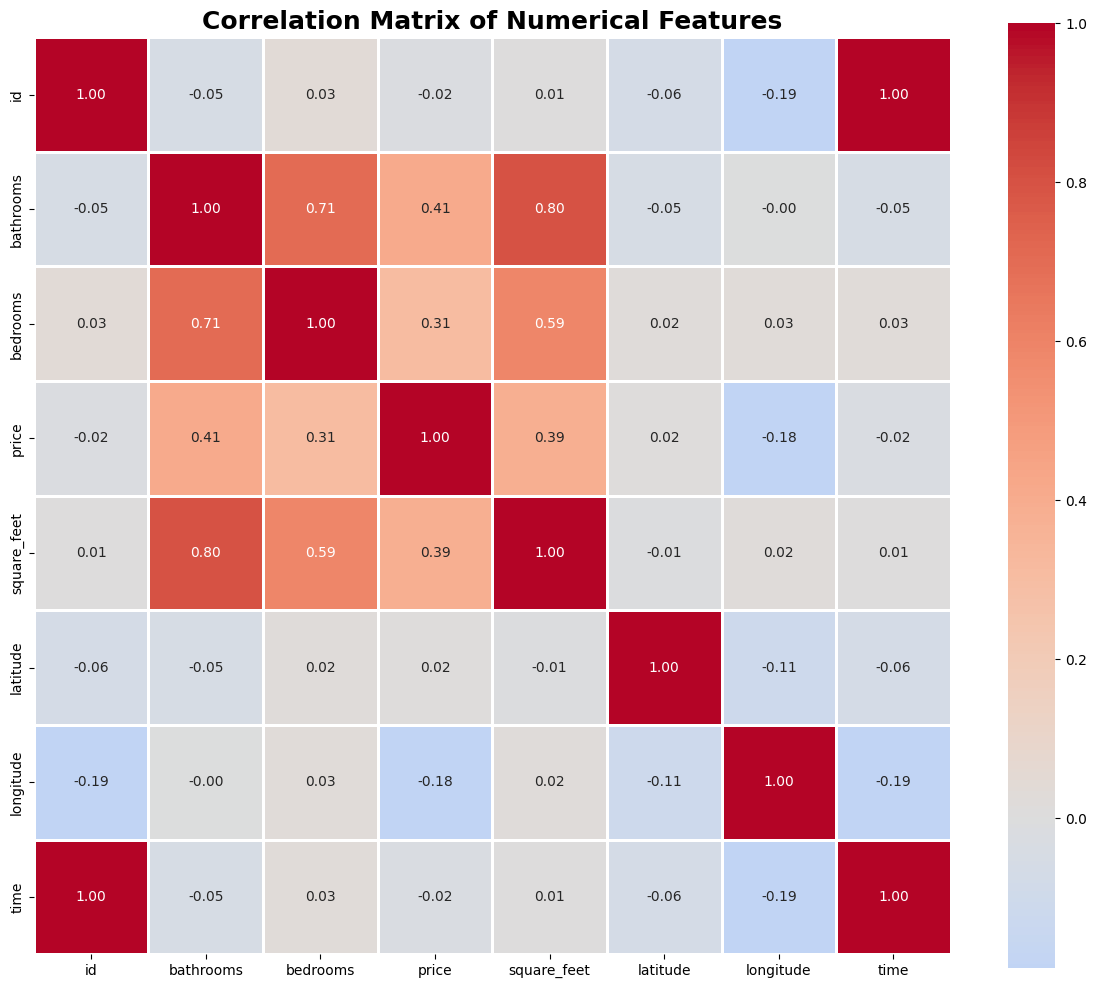


Correlation with Price (Target Variable):
bathrooms           :  0.4117
square_feet         :  0.3908
bedrooms            :  0.3065
latitude            :  0.0151
id                  : -0.0216
time                : -0.0223
longitude           : -0.1843


In [8]:
# Correlation matrix for numerical features
numerical_features = df.select_dtypes(include=[np.number]).columns
# this shows how each numeric feature is related to every other numeric feature
correlation_matrix = df[numerical_features].corr()

# correlation matrix
plt.figure(figsize=(12, 10))
# drawing a heatmap
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1)
plt.title('Correlation Matrix of Numerical Features', fontsize=18, fontweight='bold')
plt.tight_layout()
plt.show()

# Correlation with price feature (target variable)
print("\nCorrelation with Price (Target Variable):")
# sorting from the strongest to weakest correlation
price_corr = correlation_matrix['price'].sort_values(ascending=False)
# Looping through each feature and its correlation value
for feature, corr_value in price_corr.items():
    if feature != 'price':
        print(f"{feature:20s}: {corr_value:7.4f}")

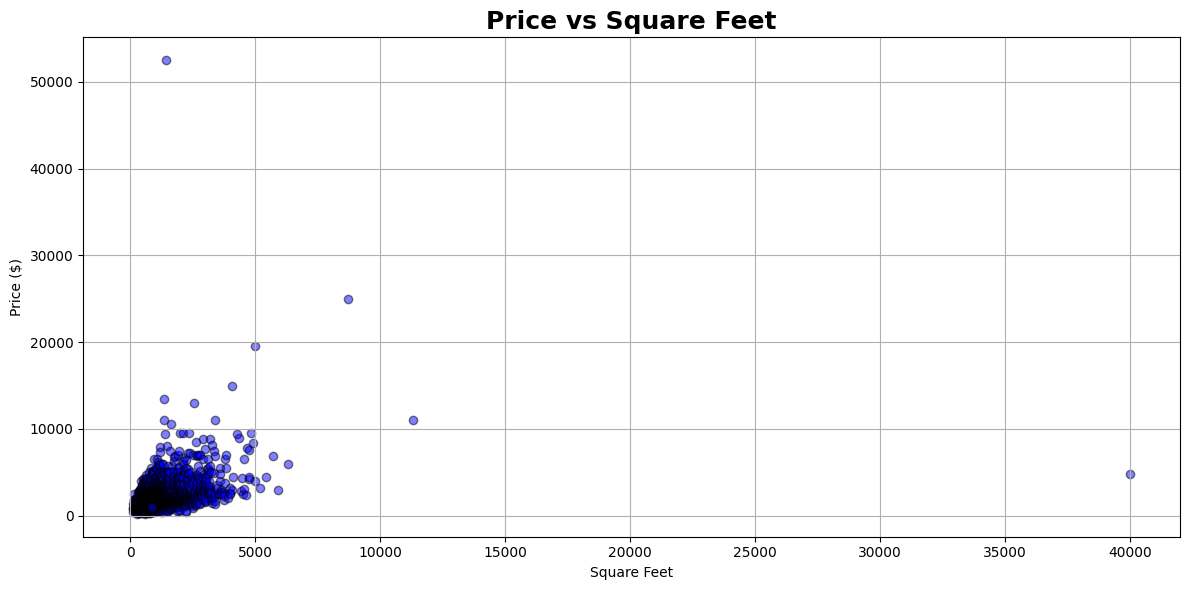

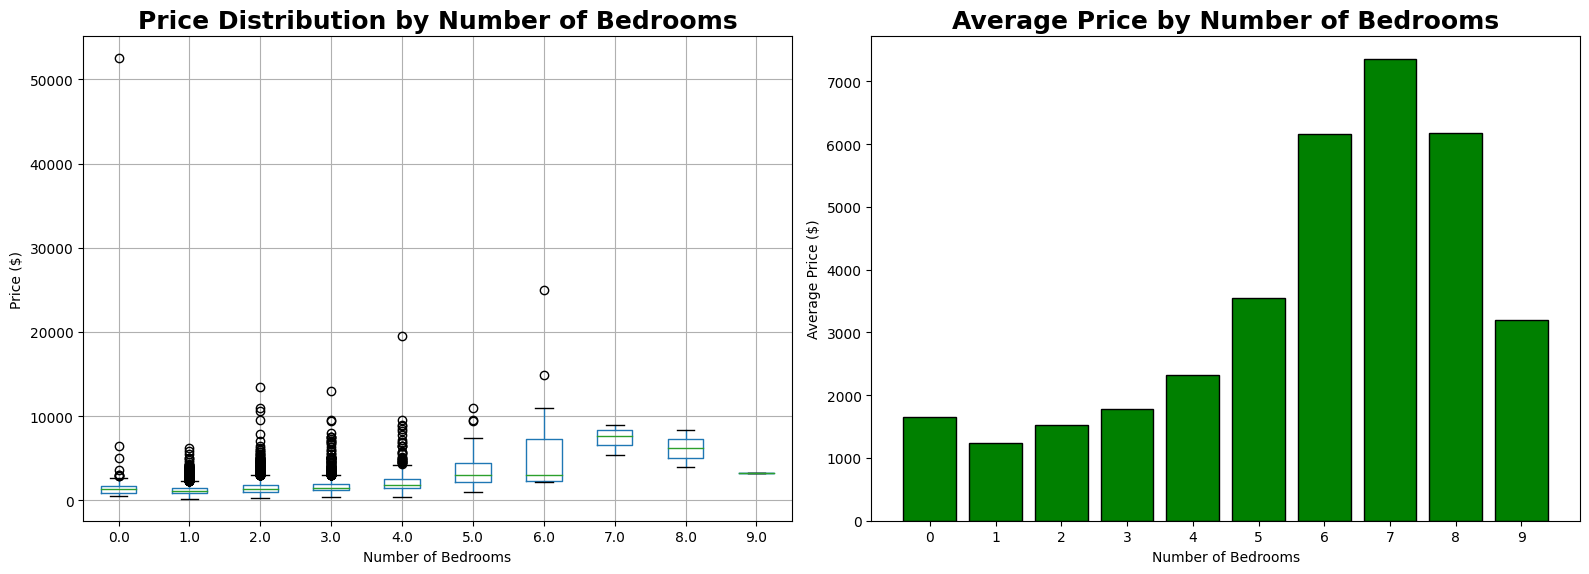

In [9]:
# Price vs Square Feet scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(df['square_feet'], df['price'], alpha=0.5, c='blue', edgecolors="black")
plt.title('Price vs Square Feet', fontsize=18, fontweight='bold')
plt.xlabel('Square Feet')
plt.ylabel('Price ($)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Price by number of bedrooms
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

df.boxplot(column='price', by='bedrooms', ax=axes[0])
axes[0].set_title('Price Distribution by Number of Bedrooms', fontsize=18, fontweight='bold')
axes[0].set_xlabel('Number of Bedrooms')
axes[0].set_ylabel('Price ($)')
axes[0].get_figure().suptitle('')

# Average price by number of bedrooms
avg_price_bedrooms = df.groupby('bedrooms')['price'].mean().sort_index()
axes[1].bar(avg_price_bedrooms.index, avg_price_bedrooms.values, color='green', edgecolor='black')
axes[1].set_title('Average Price by Number of Bedrooms', fontsize=18, fontweight='bold')
axes[1].set_xlabel('Number of Bedrooms')
axes[1].set_ylabel('Average Price ($)')
axes[1].set_xticks(avg_price_bedrooms.index)

plt.tight_layout()
plt.show()

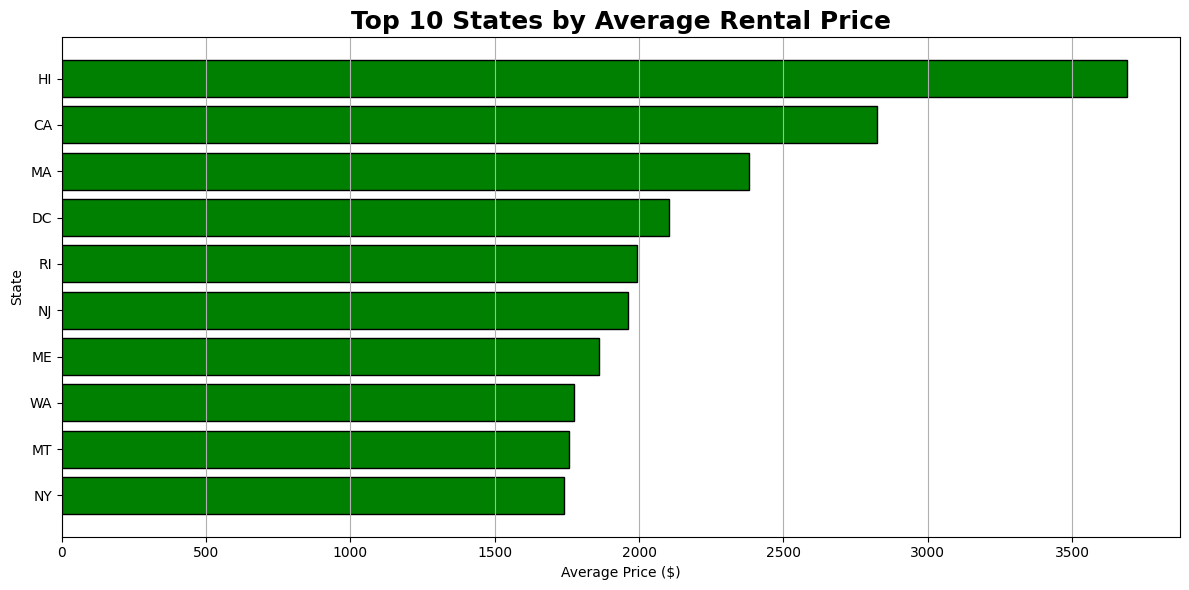


Top 10 States by Average Rental Price:
 1. HI    - $3,689.08
 2. CA    - $2,825.55
 3. MA    - $2,378.95
 4. DC    - $2,102.19
 5. RI    - $1,994.00
 6. NJ    - $1,960.23
 7. ME    - $1,862.50
 8. WA    - $1,773.77
 9. MT    - $1,755.71
10. NY    - $1,739.18


In [10]:
# Top 10 states by average rental price
top_states = df.groupby('state')['price'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
plt.barh(top_states.index, top_states.values, color='green', edgecolor='black')
plt.title('Top 10 States by Average Rental Price', fontsize=18, fontweight='bold')
plt.xlabel('Average Price ($)')
plt.ylabel('State')
plt.gca().invert_yaxis()
plt.grid(True, axis='x')
plt.tight_layout()
plt.show()

print("\nTop 10 States by Average Rental Price:")
for i, (state, price) in enumerate(top_states.items(), 1):
    print(f"{i:2d}. {state:5s} - ${price:,.2f}")

### Task 3: Data preparation

In [11]:
# Checking for missing values in the dataset, calculating the total number of missing values in each column
missing_values = df.isnull().sum()
# calculating the % of missing values
missing_percent = (df.isnull().sum() / len(df)) * 100
# Dataframe is created to display the missing values information
missing_df = pd.DataFrame({
    'Column': missing_values.index, # column names
    'Missing_Count': missing_values.values, # number of missing values 
    'Percentage': missing_percent.values # percentage of missing values 
})
# keeping columns that have missing values and sorting in the descending oreder
missing_df = missing_df[missing_df['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)

print("Missing Values Summary:")
if len(missing_df) > 0:
    print(missing_df.to_string(index=False))
else:
    print("No missing values found")
    
print(f"\nTotal Missing Values: {df.isnull().sum().sum()}")

Missing Values Summary:
      Column  Missing_Count  Percentage
pets_allowed           4163       41.63
   amenities           3549       35.49
     address           3327       33.27
    cityname             77        0.77
       state             77        0.77
   bathrooms             34        0.34
    latitude             10        0.10
   longitude             10        0.10
    bedrooms              7        0.07

Total Missing Values: 11254


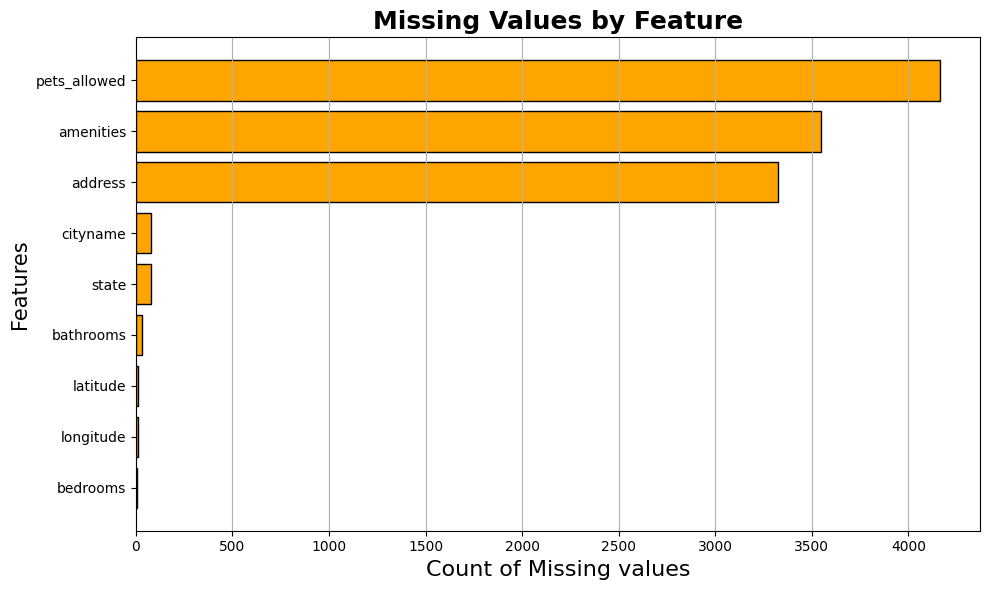

In [12]:
# Visualizing missing values in Bar Chart
plt.figure(figsize=(10, 6))

if len(missing_df[missing_df['Missing_Count'] > 0]) > 0:
    # If there are missing values, bar chart is be shown
    plt.barh(missing_df[missing_df['Missing_Count'] > 0]['Column'], 
             missing_df[missing_df['Missing_Count'] > 0]['Missing_Count'], 
             color='orange', edgecolor='black')
    plt.xlabel('Count of Missing values', fontsize=16)
    plt.ylabel('Features', fontsize=15)
    plt.title('Missing Values by Feature', fontsize=18, fontweight='bold')
    plt.grid(True, axis='x')
    plt.gca().invert_yaxis()  # highest on top
else:
    # If no missing values, show message
    plt.text(0.5, 0.5, 'No missing values detected', 
             ha='center', va='center', fontsize=18, fontweight='bold',
             bbox=dict(boxstyle='round', facecolor='lightgreen'))
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.axis('off')

plt.tight_layout()
plt.show()

In [13]:
# Created a copy of dataset
df_clean = df.copy()

# Handling missing values
print("Handling Missing Values:")

# For bathrooms feature, filling missing values with median
if df_clean['bathrooms'].isnull().sum() > 0:
    bathrooms_median = df_clean['bathrooms'].median()
    df_clean['bathrooms'].fillna(bathrooms_median, inplace=True)
    print(f"Bathrooms: Filled {df['bathrooms'].isnull().sum()} missing values with median ({bathrooms_median})")

# For bedrooms, filling missing values with median
if df_clean['bedrooms'].isnull().sum() > 0:
    bedrooms_median = df_clean['bedrooms'].median()
    df_clean['bedrooms'].fillna(bedrooms_median, inplace=True)
    print(f"Bedrooms: Filled {df['bedrooms'].isnull().sum()} missing values with median ({bedrooms_median})")

# For square_feet feature, fill with median
if df_clean['square_feet'].isnull().sum() > 0:
    sqft_median = df_clean['square_feet'].median()
    df_clean['square_feet'].fillna(sqft_median, inplace=True)
    print(f"Square Feet: Filled {df['square_feet'].isnull().sum()} missing values with median ({sqft_median})")

# For latitude/longitude, drop rows with missing values (as they are crucial for location)
initial_rows = len(df_clean)
df_clean = df_clean.dropna(subset=['latitude', 'longitude'])
dropped_rows = initial_rows - len(df_clean)
if dropped_rows > 0:
    print(f"Latitude/Longitude: Dropped {dropped_rows} rows with missing location data")

# For categorical features, filling missing values with 'Unknown'
for col in ['state', 'cityname']:
    if df_clean[col].isnull().sum() > 0:
        df_clean[col].fillna('Unknown', inplace=True)
        print(f"{col}: Filled {df[col].isnull().sum()} missing values with 'Unknown'")

# For pets_allowed feature, fill with 'None' (most common)
if df_clean['pets_allowed'].isnull().sum() > 0:
    df_clean['pets_allowed'].fillna('None', inplace=True)
    print(f"Pets Allowed: Filled {df['pets_allowed'].isnull().sum()} missing values with 'None'")

# Final check for any remaining missing values in features we plan to use
# We fill any remaining numerical NaNs with 0 or median to be safe
numerical_cols = df_clean.select_dtypes(include=[np.number]).columns
for col in numerical_cols:
    if df_clean[col].isnull().sum() > 0:
        df_clean[col].fillna(df_clean[col].median(), inplace=True)

Handling Missing Values:
Bathrooms: Filled 34 missing values with median (1.0)
Bedrooms: Filled 7 missing values with median (2.0)
Latitude/Longitude: Dropped 10 rows with missing location data
state: Filled 77 missing values with 'Unknown'
cityname: Filled 77 missing values with 'Unknown'
Pets Allowed: Filled 4163 missing values with 'None'


/var/folders/jt/r8c2c81j45q017ztmy7m9pzr0000gp/T/ipykernel_9952/704146592.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean['bathrooms'].fillna(bathrooms_median, inplace=True)
/var/folders/jt/r8c2c81j45q017ztmy7m9pzr0000gp/T/ipykernel_9952/704146592.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting v

### Feaute Engineering

In [14]:
print("Feature Engineering:")

# Creating price per square foot feature
df_clean['price_per_sqft'] = df_clean['price'] / df_clean['square_feet']
print("Created feature: price_per_sqft")

# Create total rooms feature
df_clean['total_rooms'] = df_clean['bathrooms'] + df_clean['bedrooms']
print("Created feature: total_rooms")

# Creating binary feature for pet-allowed apartments
df_clean['pets_friendly'] = df_clean['pets_allowed'].apply(lambda x: 1 if x not in ['None', 'null'] else 0)
print("Created feature: pets_friendly")

# Create binary feature for has_photo
df_clean['has_photo_binary'] = df_clean['has_photo'].apply(lambda x: 1 if x == 'Thumbnail' else 0)
print("Created feature: has_photo_binary")

print(f"\nTotal features after engineering: {df_clean.shape[1]}")

Feature Engineering:
Created feature: price_per_sqft
Created feature: total_rooms
Created feature: pets_friendly
Created feature: has_photo_binary

Total features after engineering: 26


In [16]:
# Selecting features for modeling
# We exclude 'price_per_sqft' as it contains the target variable 'price' (Data Leakage)
feature_columns = [
    'square_feet', 'bathrooms', 'bedrooms', 'latitude', 'longitude',
    'total_rooms', 'pets_friendly', 'has_photo_binary'
]

# Target variable
target_column = 'price'

# Creating feature matrix X and target vector y
X = df_clean[feature_columns].copy()
y = df_clean[target_column].copy()

print(f"Feature Matrix Shape: {X.shape}")
print(f"\nFeatures selected for modeling:")
for i, feature in enumerate(feature_columns, 1):
    print(f"  {i}. {feature}")

Feature Matrix Shape: (9990, 8)

Features selected for modeling:
  1. square_feet
  2. bathrooms
  3. bedrooms
  4. latitude
  5. longitude
  6. total_rooms
  7. pets_friendly
  8. has_photo_binary


### Feature scaling

In [17]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
# an instance of the Scaler is created
scaler = StandardScaler()
# Fitting the scaler on the feature matrix X and then transforming it
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=feature_columns, index=X.index)

print("Feature Scaling:")

print(f"Scaled Feature Matrix Shape: {X_scaled.shape}")
print("\nScaling Statistics (Mean and Std for each feature):")
# Looping through each feature and displaying its mean and SD
for i, col in enumerate(feature_columns):
    print(f"  {col:20s} - Mean: {scaler.mean_[i]:10.4f}, - Std: {scaler.scale_[i]:10.4f}")

Feature Scaling:
Scaled Feature Matrix Shape: (9990, 8)

Scaling Statistics (Mean and Std for each feature):
  square_feet          - Mean:   946.1663, - Std:   655.8006
  bathrooms            - Mean:     1.3795, - Std:     0.6148
  bedrooms             - Mean:     1.7447, - Std:     0.9422
  latitude             - Mean:    37.6952, - Std:     5.4956
  longitude            - Mean:   -94.6522, - Std:    15.7590
  total_rooms          - Mean:     3.1242, - Std:     1.4431
  pets_friendly        - Mean:     0.5840, - Std:     0.4929
  has_photo_binary     - Mean:     0.8906, - Std:     0.3122


### Train Test split

In [18]:
# importing train_test_split to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Splitting the scaled feature data (X_scaled) and target variable (y)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

print("Train-Test Split:")
print(f"Training Set Size: {X_train.shape[0]} samples ({X_train.shape[0]/len(X_scaled)*100:.1f}%)")
print(f"Testing Set Size:  {X_test.shape[0]} samples ({X_test.shape[0]/len(X_scaled)*100:.1f}%)")
print(f"\nTraining Features Shape: {X_train.shape}")
print(f"Testing Features Shape:  {X_test.shape}")

Train-Test Split:
Training Set Size: 7992 samples (80.0%)
Testing Set Size:  1998 samples (20.0%)

Training Features Shape: (7992, 8)
Testing Features Shape:  (1998, 8)


### Task 4: Model Training

In [27]:
# Importing libraries for modeling
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 1st Model: Linear regression model training
print("Training Linear Regression Model:")
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
print(f"Model is trained with the number of features: {lr_model.n_features_in_}")

Training Linear Regression Model:
Model is trained with the number of features: 8


In [28]:
# 2nd Model: Random forest regressor model training with initial parameters
# Train Random Forest Regressor with initial parameters
print("Training Random Forest Regressor:")

random_forest_model = RandomForestRegressor(
    n_estimators=100,
    max_depth=20,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42,
    n_jobs=-1
)
random_forest_model.fit(X_train, y_train)

print(f"Number of trees: {random_forest_model.n_estimators}")
print(f"Max depth: {random_forest_model.max_depth}")
print(f"Number of features: {random_forest_model.n_features_in_}")

Training Random Forest Regressor:
Number of trees: 100
Max depth: 20
Number of features: 8


In [29]:
# Hyperparameter for Random forest using "GridSearchCV"
print("Hyperparameter Tuning for Random Forest:")
# we test different values for these parameters to find the best model
param_grid_rf = {
    'n_estimators': [100, 150], # number of trees in the forest
    'max_depth': [15, 20], # maximum depth of each tree
    'min_samples_split': [5, 10] # minimum samples
}
# created GridSearchCV object that will train Random Forest models using different parameters combinations
grid_search_rf = GridSearchCV(
    RandomForestRegressor(random_state=42, n_jobs=-1),
    param_grid_rf,
    cv=3,
    scoring='r2',
    n_jobs=-1,
    verbose=1
)
# Now testing all parameter combinations defined in param_grid_rf
grid_search_rf.fit(X_train, y_train)

print(f"Best parameters: {grid_search_rf.best_params_}")
print(f"Best cross-validation r2 score: {grid_search_rf.best_score_:.4f}")

# Extracting the best model from GridSearchCV
rf_model_tuned = grid_search_rf.best_estimator_

Hyperparameter Tuning for Random Forest:
Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best parameters: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 150}
Best cross-validation r2 score: 0.5311


In [30]:
# 3rd Model: Gradient boosting regressor model training
print("Gradient boosting regressor model training:")

gb_model = GradientBoostingRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42
)
gb_model.fit(X_train, y_train)

print(f"Number of estimators: {gb_model.n_estimators}")
print(f"Learning rate: {gb_model.learning_rate}")
print(f"Max depth: {gb_model.max_depth}")
print(f"Number of features: {gb_model.n_features_in_}")

Gradient boosting regressor model training:
Number of estimators: 100
Learning rate: 0.1
Max depth: 5
Number of features: 8


In [31]:
# Hyperparameter for Gradient boosting
print("Hyperparameter Tuning for Gradient Boosting:")

param_grid_gb = {
    'n_estimators': [100, 150],
    'learning_rate': [0.1, 0.05],
    'max_depth': [3, 5]
}
# created GridSearchCV object that will train multiple Gradient Boosting models using different parameters combinations above
grid_search_gb = GridSearchCV(
    GradientBoostingRegressor(random_state=42),
    param_grid_gb,
    cv=3,
    scoring='r2',
    n_jobs=-1,
    verbose=1
)
# This will test every parameter combination
grid_search_gb.fit(X_train, y_train)

print(f"Best parameters: {grid_search_gb.best_params_}")
print(f"Best cross-validation r2 score: {grid_search_gb.best_score_:.4f}")
# Storing the best trained Gradient Boosting model
gb_model_tuned = grid_search_gb.best_estimator_

Hyperparameter Tuning for Gradient Boosting:
Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 150}
Best cross-validation r2 score: 0.5413


### Task 5: Model evaluation

In [24]:
# Function to calculate and display model metrics
def evaluate_model(model, X_test, y_test, model_name):
    # this function evaluated a regression model using test data
    # it calculates mean absolute error, mean squared error and R2
    y_pred = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"\n{model_name} Metrics:")
    print("-" * 40)
    print(f"Mean Absolute Error: ${mae:,.2f}")
    print(f"Mean Squared Error:  ${mse:,.2f}")
    print(f"r2 Score:            {r2:.4f}")
    
    return {'Model': model_name, 'MAE': mae, 'MSE': mse, 'R2': r2}

# Storing results of all models
results = []

# Evaluating all models
results.append(evaluate_model(lr_model, X_test, y_test, "Linear Regression"))
results.append(evaluate_model(rf_model_tuned, X_test, y_test, "Random Forest (Tuned)"))
results.append(evaluate_model(gb_model_tuned, X_test, y_test, "Gradient Boosting (Tuned)"))


Linear Regression Metrics:
----------------------------------------
Mean Absolute Error: $501.89
Mean Squared Error:  $1,006,681.84
r2 Score:            -0.4165

Random Forest (Tuned) Metrics:
----------------------------------------
Mean Absolute Error: $246.64
Mean Squared Error:  $171,682.60
r2 Score:            0.7584

Gradient Boosting (Tuned) Metrics:
----------------------------------------
Mean Absolute Error: $254.88
Mean Squared Error:  $176,232.75
r2 Score:            0.7520


Model comparison summary
                    Model        MAE          MSE        R2
        Linear Regression 501.888269 1.006682e+06 -0.416471
    Random Forest (Tuned) 246.636111 1.716826e+05  0.758431
Gradient Boosting (Tuned) 254.883263 1.762328e+05  0.752028


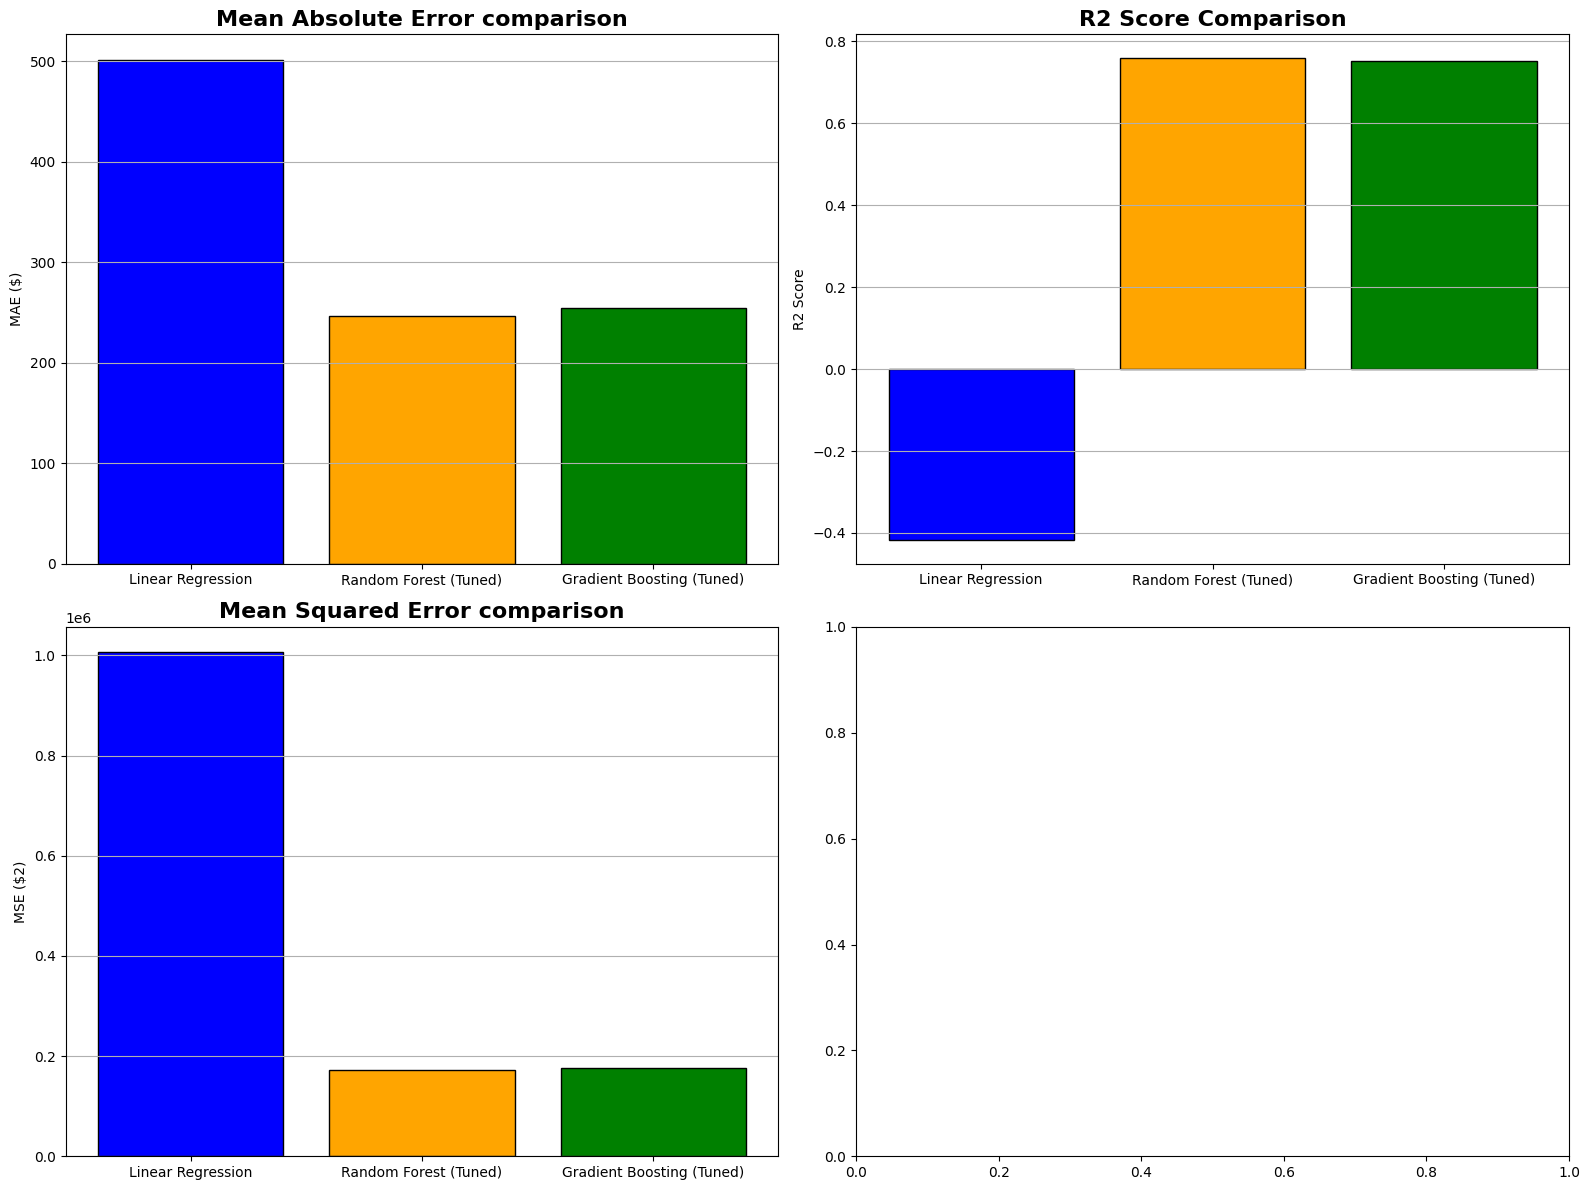

In [25]:
# Model comparison summary
results_df = pd.DataFrame(results)

print("Model comparison summary")
print(results_df.to_string(index=False))

# Visualize model comparison
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Mean absolute error comparison
axes[0, 0].bar(results_df['Model'], results_df['MAE'], color=['blue', 'orange', 'green'], edgecolor='black')
axes[0, 0].set_title('Mean Absolute Error comparison', fontsize=16, fontweight='bold')
axes[0, 0].set_ylabel('MAE ($)')
axes[0, 0].tick_params(axis='x')
axes[0, 0].grid(True, axis='y')

# r2 comparison
axes[0, 1].bar(results_df['Model'], results_df['R2'], color=['blue', 'orange', 'green'], edgecolor='black')
axes[0, 1].set_title('R2 Score Comparison', fontsize=16, fontweight='bold')
axes[0, 1].set_ylabel('R2 Score')
axes[0, 1].tick_params(axis='x')
axes[0, 1].grid(True, axis='y')
# R2 score for Linear regression is negative so the graph is shown inproperly 

# Mean squared error comparison
axes[1, 0].bar(results_df['Model'], results_df['MSE'], color=['blue', 'orange', 'green'], edgecolor='black')
axes[1, 0].set_title('Mean Squared Error comparison', fontsize=16, fontweight='bold')
axes[1, 0].set_ylabel('MSE ($2)')
axes[1, 0].tick_params(axis='x')
axes[1, 0].grid(True, axis='y')

plt.tight_layout()
plt.show()

In [26]:
# Based on MAE and R2 selecting the best model
best_model = results_df.sort_values(by=['MAE', 'R2'], ascending=[True, False]).iloc[0]

print("\nBest Model:")
print(best_model)



Best Model:
Model    Random Forest (Tuned)
MAE                 246.636111
MSE              171682.596137
R2                    0.758431
Name: 1, dtype: object


### Task 6: Deployment

In [32]:
import pickle
with open('model.pkl', 'wb') as f:
    pickle.dump(random_forest_model, f)

print("Model saved to model.pkl")

Model saved to model.pkl


In [33]:
# Just For Min Max Values in Input
for col in feature_columns:
    print(f"{col:20s} - Min: {X[col].min():10.4f}, Max: {X[col].max():10.4f}, Mean: {X[col].mean():10.4f}, Std: {X[col].std():10.4f}")


square_feet          - Min:   101.0000, Max: 40000.0000, Mean:   946.1663, Std:   655.8334
bathrooms            - Min:     1.0000, Max:     8.5000, Mean:     1.3795, Std:     0.6149
bedrooms             - Min:     0.0000, Max:     9.0000, Mean:     1.7447, Std:     0.9423
latitude             - Min:    21.3155, Max:    61.5940, Mean:    37.6952, Std:     5.4959
longitude            - Min:  -158.0221, Max:   -70.1916, Mean:   -94.6522, Std:    15.7598
total_rooms          - Min:     1.0000, Max:    14.5000, Mean:     3.1242, Std:     1.4432
pets_friendly        - Min:     0.0000, Max:     1.0000, Mean:     0.5840, Std:     0.4929
has_photo_binary     - Min:     0.0000, Max:     1.0000, Mean:     0.8906, Std:     0.3122
